<a href="https://colab.research.google.com/github/reflectormensah/Financial-Engineering-Data-Science/blob/main/LDA_SVM_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Discriminant Analysis


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

In [ ]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Step 1: Computing the within-class and between-class scatter matrices

# Compute class-wise means
class_means = np.array([X_scaled[y == i].mean(axis=0) for i in range(len(target_names))])

# Initialize within-class and between-class scatter matrices
S_W = np.zeros((X_scaled.shape[1], X_scaled.shape[1]))
S_B = np.zeros((X_scaled.shape[1], X_scaled.shape[1]))

for i in range(len(target_names)):
    # Calculate within-class scatter matrix for each class
    class_scatter = np.cov(X_scaled[y == i], rowvar=False)
    S_W += class_scatter

    # Calculate between-class scatter matrix
    n = X_scaled[y == i].shape[0]
    mean_diff = (class_means[i] - np.mean(X_scaled, axis=0)).reshape(-1, 1)
    S_B += n * mean_diff.dot(mean_diff.T)

In [ ]:
# Step 2: Computing the eigenvectors and their corresponding eigenvalues for the scatter matrices
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


In [ ]:
# Step 3: Sorting the eigenvalues and selecting the top k
eigenvalue_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenvalue_pairs = sorted(eigenvalue_pairs, key=lambda x: x[0], reverse=True)
top_k = 2  # Number of components to keep
selected_eigenvalues = np.array([eigenvalue_pairs[i][0] for i in range(top_k)])
selected_eigenvectors = np.array([eigenvalue_pairs[i][1] for i in range(top_k)])


In [ ]:
# Step 4: Creating a new matrix that will contain the eigenvectors mapped to the k eigenvalues
lda_matrix = np.column_stack((eigenvalue_pairs[i][1].real for i in range(top_k)))  # Use .real to ensure real values


<ipython-input-7-e341c4c9b072>:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  lda_matrix = np.column_stack((eigenvalue_pairs[i][1].real for i in range(top_k)))  # Use .real to ensure real values


In [ ]:
# Corrected Step 5: Obtaining new features by taking the dot product of the data and the matrix from Step 4
X_lda_custom = X_scaled.dot(lda_matrix)

Text(0, 0.5, 'Feature 2 (Standardized)')

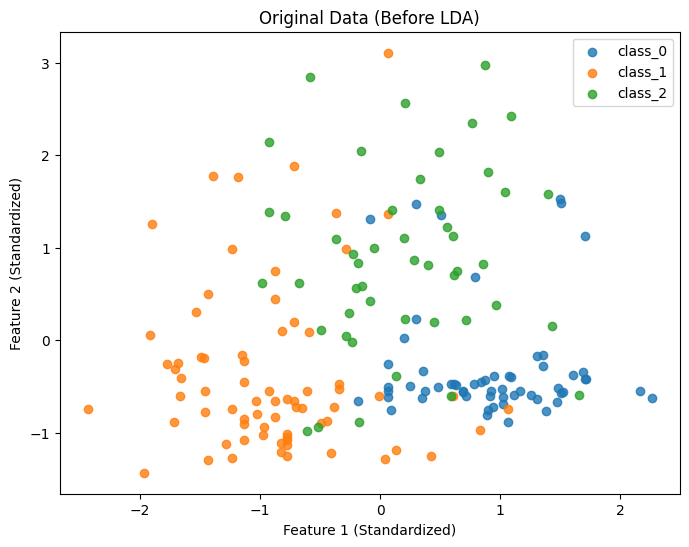

In [ ]:
# Plot the original data
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Original Data (Before LDA)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')


Text(0, 0.5, 'LD2')

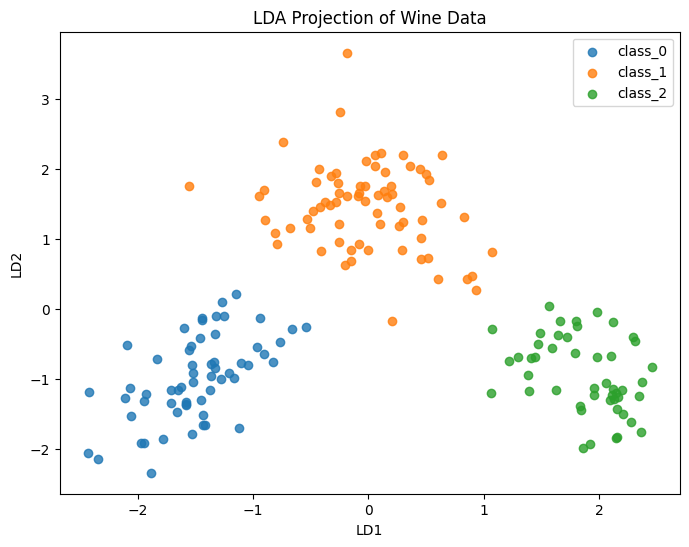

In [ ]:
# Plot the LDA results
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_lda_custom[y == i, 0], X_lda_custom[y == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA Projection of Wine Data')
plt.xlabel('LD1')
plt.ylabel('LD2')


Accuracy of the LDA-based model: 98.15%


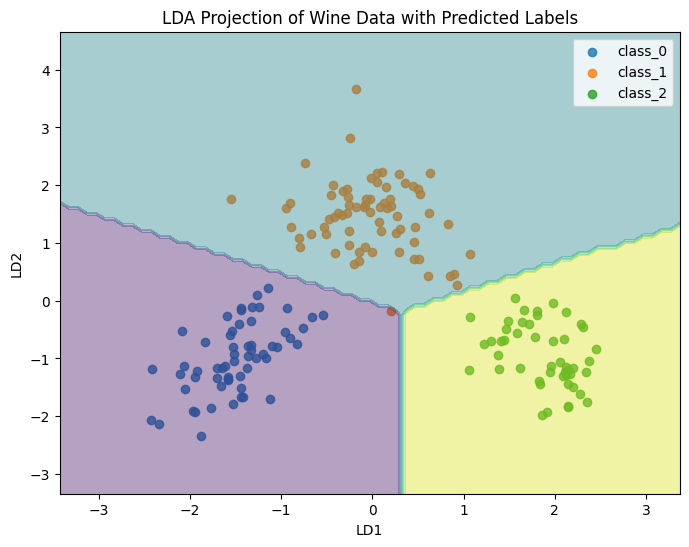

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda_custom, y, test_size=0.3, random_state=42)

# Train a classifier (e.g., Logistic Regression) on the LDA-transformed data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict labels on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the LDA-based model: {accuracy * 100:.2f}%")

# Plot the LDA results with predicted labels
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_lda_custom[y == i, 0], X_lda_custom[y == i, 1], alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA Projection of Wine Data with Predicted Labels')
plt.xlabel('LD1')
plt.ylabel('LD2')

# Add decision boundaries
x_min, x_max = X_lda_custom[:, 0].min() - 1, X_lda_custom[:, 0].max() + 1
y_min, y_max = X_lda_custom[:, 1].min() - 1, X_lda_custom[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

## Support Vector Machines

In [ ]:
# Load libraries

import warnings
from datetime import datetime

import numpy as np
import pandas as pd

import scipy as sp

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

warnings.filterwarnings("ignore")



In [ ]:
# downloading the data

cancer = load_breast_cancer( )
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df_target = pd.DataFrame(cancer.target, columns=["Target"])
df_target

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
X = df.copy()
y = df_target.copy()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
# defining parameter range
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100, 1000],
    "kernel": ["rbf", "linear", "poly"],
}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, cv=4)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV 1/4] END ................C=0.01, kernel=rbf;, score=0.606 total time=   0.0s
[CV 2/4] END ................C=0.01, kernel=rbf;, score=0.606 total time=   0.0s
[CV 3/4] END ................C=0.01, kernel=rbf;, score=0.606 total time=   0.0s
[CV 4/4] END ................C=0.01, kernel=rbf;, score=0.592 total time=   0.0s
[CV 1/4] END .............C=0.01, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/4] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.0s
[CV 3/4] END .............C=0.01, kernel=linear;, score=0.986 total time=   0.0s
[CV 4/4] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.0s
[CV 1/4] END ...............C=0.01, kernel=poly;, score=0.803 total time=   0.0s
[CV 2/4] END ...............C=0.01, kernel=poly;, score=0.859 total time=   0.0s
[CV 3/4] END ...............C=0.01, kernel=poly;, score=0.817 total time=   0.0s
[CV 4/4] END ...............C=0.01, kernel=poly;

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'kernel': 'linear'}
SVC(C=1000, kernel='linear')


In [ ]:
# Create a svm Classifier
clf_tuned = svm.SVC(
    random_state=0,
    C=grid.best_params_["C"],
    kernel=grid.best_params_["kernel"],
    probability=True,
)

clf_tuned.fit(X_train, y_train)

SVC(C=1000, kernel='linear', probability=True, random_state=0)

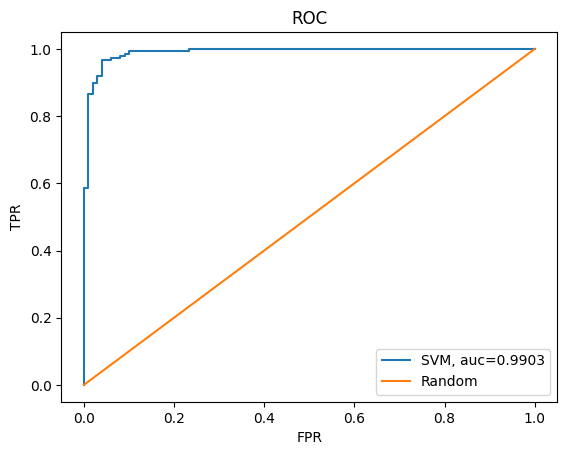

In [ ]:
# Performance

# predicted probabilities generated by sklearn classifier
y_pred_proba = clf_tuned.predict_proba(X_test)

# SVM ROC dependencies
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

auc = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)

# SVM Model
plt.plot(fpr, tpr, label="SVM, auc=" + str(auc))

# Random guess model
plt.plot(fpr, fpr, "-", label="Random")
plt.title("ROC")
plt.ylabel("TPR")
plt.xlabel("FPR")

plt.legend(loc=4)
plt.show()

## Neural Networks

Buidling NN to predict house prices

In [ ]:
# Importing the necessary libraries

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving houseprices.csv to houseprices.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['houseprices.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
dataset = df2.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
#Spliting he dataset into input features and predict Features
X = dataset[:,0:10]
Y = dataset[:,10]

In [ ]:
# Preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
# Splitting the dataset
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [ ]:
# Building and Training our First Neural Network

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
# Configuration
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6905 - accuracy: 0.5059 - val_loss: 0.6894 - val_accuracy: 0.4749
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5068 - val_loss: 0.6821 - val_accuracy: 0.4795
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5098 - val_loss: 0.6749 - val_accuracy: 0.4977
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5333 - val_loss: 0.6674 - val_accuracy: 0.5388
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5793 - val_loss: 0.6590 - val_accuracy: 0.5890
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.5998 - val_loss: 0.6493 - val_accuracy: 0.7169
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7035 - val_loss: 0.6393 - val_accuracy: 0.7854
Epoch 8/100
3

In [ ]:
# Evaluating the model
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8767


0.8767123222351074

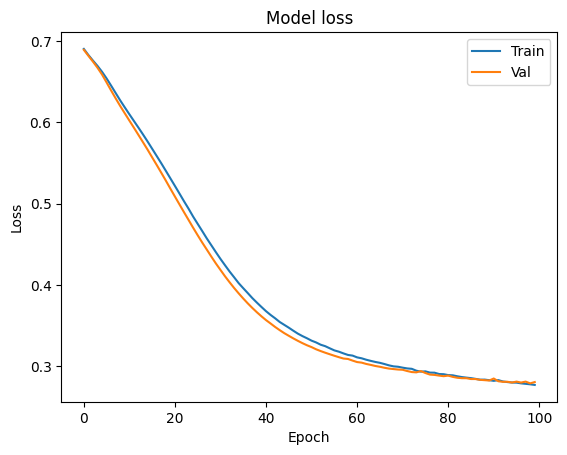

In [ ]:
# Visulaizing Loss and Accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

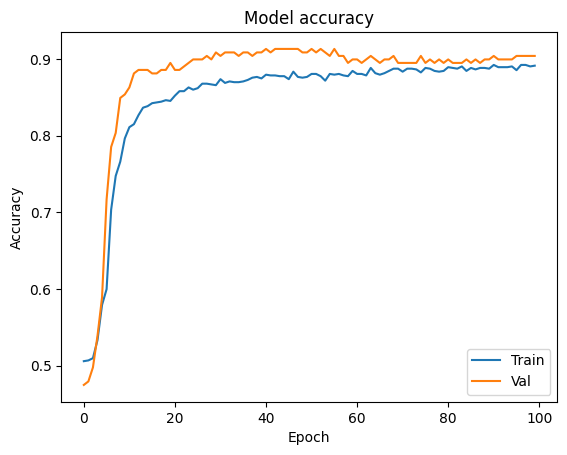

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# Adding regularization to the NN model
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 27ms/step - loss: 0.5039 - accuracy: 0.7495 - val_loss: 0.3434 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 23ms/step - loss: 0.3600 - accuracy: 0.8542 - val_loss: 0.4346 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 1s 23ms/step - loss: 0.3423 - accuracy: 0.8650 - val_loss: 0.2974 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2744 - accuracy: 0.8845 - val_loss: 0.3408 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.2608 - accuracy: 0.8904 - val_loss: 0.2850 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2569 - accuracy: 0.8885 - val_loss: 0.2976 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2368 - accuracy: 0.8963 - val_loss: 0.3027 - val_accuracy: 0.8995
Epoch 

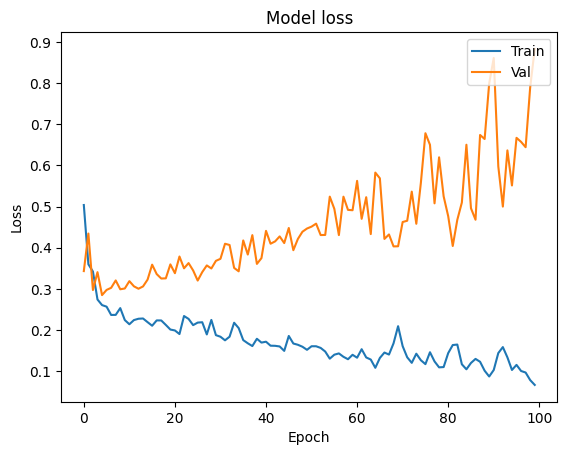

In [ ]:
# Plotting 2nd model's accuracy and loss after regularization
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

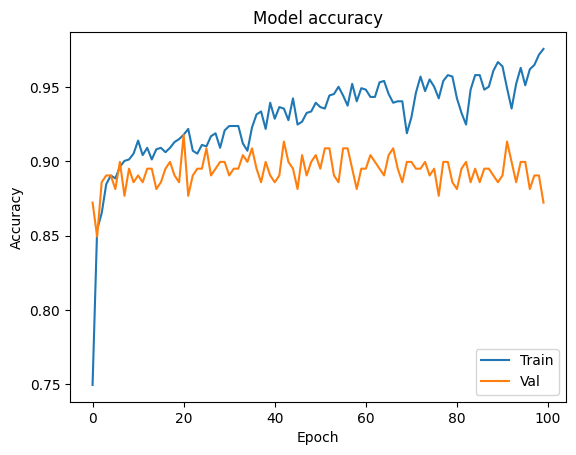

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# Specifying our third model
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 28ms/step - loss: 14.2185 - accuracy: 0.6536 - val_loss: 3.8722 - val_accuracy: 0.7991
Epoch 2/100
32/32 [==============================] - 1s 26ms/step - loss: 1.6567 - accuracy: 0.8405 - val_loss: 0.6200 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5718 - accuracy: 0.8562 - val_loss: 0.4901 - val_accuracy: 0.9132
Epoch 4/100
32/32 [==============================] - 1s 25ms/step - loss: 0.5066 - accuracy: 0.8708 - val_loss: 0.4721 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 26ms/step - loss: 0.4922 - accuracy: 0.8699 - val_loss: 0.4526 - val_accuracy: 0.9132
Epoch 6/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5109 - accuracy: 0.8562 - val_loss: 0.4566 - val_accuracy: 0.9132
Epoch 7/100
32/32 [==============================] - 1s 27ms/step - loss: 0.4910 - accuracy: 0.8571 - val_loss: 0.4553 - val_accuracy: 0.9041
Epoch

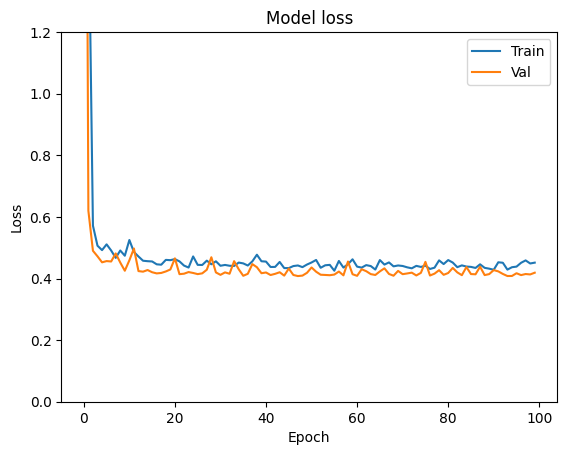

In [ ]:
# Plotting the 3rd model
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

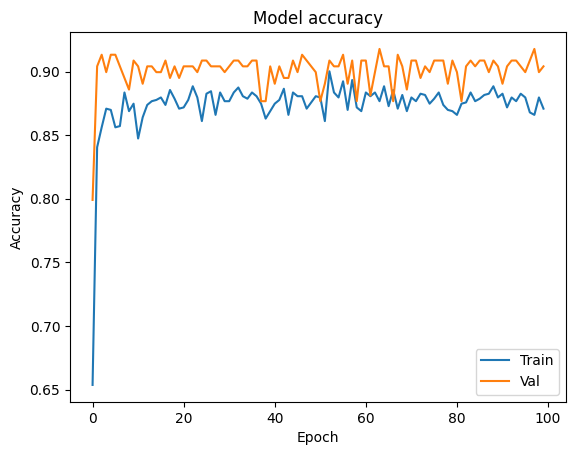

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
def find_max(nums):
  max_num = float("-inf") # smaller than all other numbers
  for num in nums:
    if num > max_num:
      # (Fill in the missing line here)
      return max_num